[View in Colaboratory](https://colab.research.google.com/github/youkaichao/decision_boundary_for_neural_networks/blob/master/decision_boundary_for_neural_networks.ipynb)

In [1]:
!pip install easydl

    100% |████████████████████████████████| 245kB 7.1MB/s 
    100% |████████████████████████████████| 256kB 8.9MB/s 
    100% |████████████████████████████████| 51kB 17.7MB/s 
    100% |████████████████████████████████| 30.8MB 807kB/s 
    100% |████████████████████████████████| 5.8MB 4.9MB/s 
    100% |████████████████████████████████| 25.4MB 1.4MB/s 
    100% |████████████████████████████████| 92kB 22.8MB/s 
    100% |████████████████████████████████| 3.3MB 5.5MB/s 
    100% |████████████████████████████████| 11.6MB 2.4MB/s 
    100% |████████████████████████████████| 51kB 15.8MB/s 
    100% |████████████████████████████████| 655kB 15.6MB/s 
    100% |████████████████████████████████| 2.0MB 9.1MB/s 
  Running setup.py bdist_wheel for easydl ... - done
  Stored in directory: /content/.cache/pip/wheels/05/f1/16/9c9845831930d7255694d61a1f76e1122cca62f121074b0ded
  Running setup.py bdist_wheel for docopt ... - done
  Stored in directory: /content/.cache/pip/wheels/9b/04/dd/7daf4150b

In [3]:
from easydl import *

pytorch not available!


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/easydl/__init__.py", line 9, in <module>
    import torch
ImportError: No module named torch


create data points

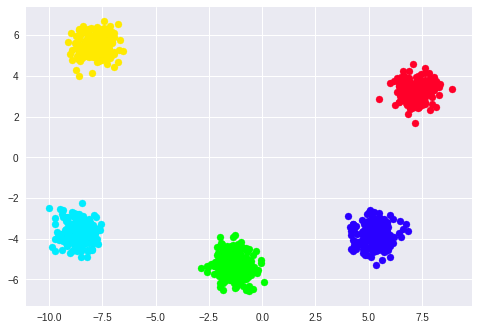

In [5]:
cm = plt.get_cmap('gist_rainbow')
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

n_clusters = 5

X, Y = make_blobs(n_samples=1000,n_features=2,centers=n_clusters, cluster_std=0.5)
x_min = X[:, 0].min()
x_max = X[:, 0].max()
x_length = x_max - x_min
x_min -= 0.05 * x_length
x_max += 0.05 * x_length
y_min = X[:, 1].min()
y_max = X[:, 1].max()
y_length = y_max - y_min
y_min -= 0.05 * y_length
y_max += 0.05 * y_length

all = [(x, y) for (x, y) in zip(X, Y)]
clusters = [[(x, y) for (x, y) in zip(X, Y) if y == i] for i in range(n_clusters)]

for i in range(n_clusters):
    plt.scatter([x[0][0] for x in clusters[i]], [x[0][1] for x in clusters[i]], c=cm(i * 1.0 / n_clusters))
    
plt.show()

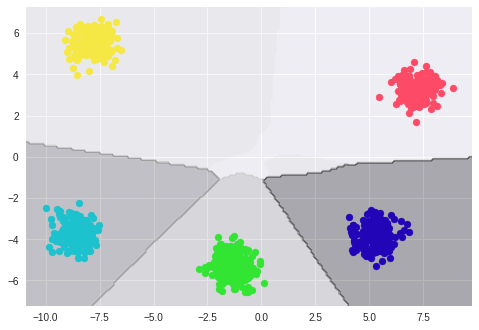

In [8]:
for i in range(n_clusters):
    plt.scatter([x[0][0] for x in clusters[i]], [x[0][1] for x in clusters[i]], c=cm(i * 1.0 / n_clusters))

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, n_clusters))
mlp.fit(X, Y)

plot_decision_boundary(mlp.predict, np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.show()